In [1]:
using Pkg
Pkg.add("Match")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Plots, Match

In [15]:
import Base: +, -, *, length

struct Point
    x::Int32
    y::Int32
end

function -(p1::Point, p2::Point)
    Point(p1.x - p2.x, p1.y - p2.y)
end

function +(p1::Point, p2::Point)
    Point(p1.x + p2.x, p1.y + p2.y)
end

function *(p1::Point, p2::Point)
    Point(p1.x **)

function to_tuple(p::Point)::Tuple{Int32, Int32}
    (p.x, p.y)
end

to_tuple (generic function with 1 method)

### 2.4

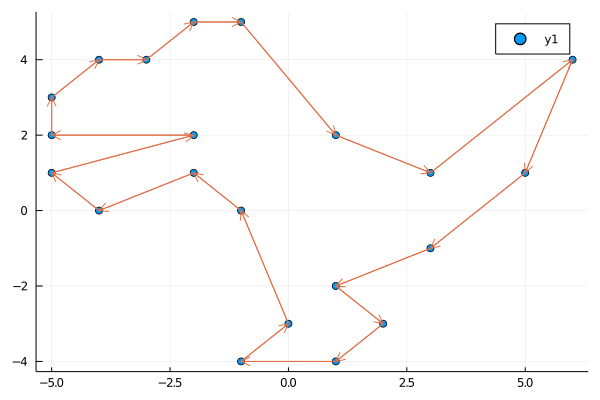

In [16]:
gr()
dino_vectors = [
    Point(6, 4),
    Point(3,1),
    Point(1,2),
    Point(-1,5),
    Point(-2,5),
    Point(-3,4),
    Point(-4,4),
    Point(-5,3),
    Point(-5,2),
    Point(-2,2),
    Point(-5,1),
    Point(-4,0),
    Point(-2,1),
    Point(-1,0),
    Point(0,-3),
    Point(-1,-4),
    Point(1,-4),
    Point(2,-3),
    Point(1,-2),
    Point(3,-1),
    Point(5,1)
]
dino_quivers = [(y - x) for (x, y) in zip(dino_vectors, circshift(dino_vectors, 1))]

dino_tuples = [to_tuple(vec) for vec in dino_vectors]
dino_quiver_tuples = [to_tuple(vec) for vec in dino_quivers]
scatter(dino_tuples)
quiver!(dino_tuples, quiver=dino_quiver_tuples)

### 2.5

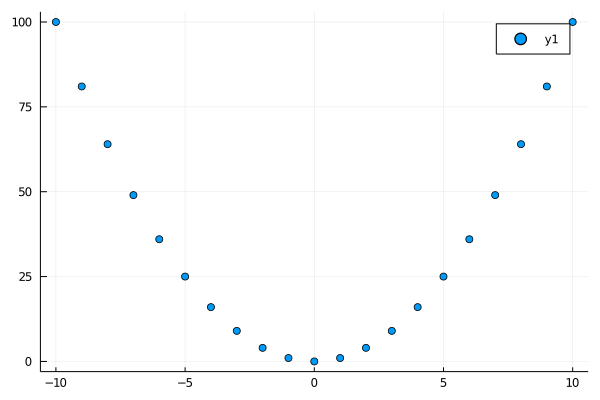

In [17]:
graph = [(x, x^2) for x in -10:10]
scatter(graph)

### 2.7

In [18]:
function add(l::Array{Point, 1})::Point
   reduce((x, y) -> x + y, l, init=Point(0,0)) 
end

add (generic function with 1 method)

In [19]:
add([Point(1,1), Point(2,2), Point(3,3)])

Point(6, 6)

### 2.8

In [20]:
function translate(translation::Point, vectors::Array{Point})
    map(x -> x + translation, vectors)
end

translate (generic function with 1 method)

In [21]:
translate(Point(1,1), [Point(0,0), Point(0,1), Point(-3,-3)])

3-element Array{Point,1}:
 Point(1, 1)
 Point(1, 2)
 Point(-2, -2)

### 2.11

In [37]:
t1 = 1

function test(n)
    @match n begin
        0 => ( println("Eat"); "Foo" )
        1 => "This"
        _ => @match n begin
            2 => "Po-po"
        end
    end
end

test (generic function with 1 method)

In [39]:
test(0)

Eat


"Foo"

In [40]:
function add_dinos_to_plot!(offset::Point)
    dino_tuples = [to_tuple(vec) for vec in translate(offset, dino_vectors)]
    dino_quiver_tuples = [to_tuple(vec) for vec in translate(offset, dino_quivers)]
    quiver!(dino_tuples, quiver=dino_quiver_tuples)
end

p_offset = add(dino_vectors)
function plot_dinos(num_x, num_y, curr_y, offset)
    scatter()
    @match num_x begin
        0 => nothing
        x => @match curr_y begin
            0 => plot_dinos(x - 1, num_y, num_y, Point(offset.x, 0))
            y => ( add_dinos_to_plot(offset); plot_dinos(x, num_y, y-1, offset + Point(x_dist, 0)))
        end
    end
end
            
plot_dinos(10, 10, 10, p_offset)

plot_dinos (generic function with 1 method)